In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib
import seaborn as sns
import sklearn
import numpy as np


Using matplotlib backend: MacOSX


# Import all library for analysis

In [2]:
data = pd.read_csv('/Users/admin/Downloads/data.csv', sep=',')

In [3]:
data.describe()

,nominal,curs
count,409.0,409.000000
mean,1.0,46.351429
std,0.0,1.598703
min,1.0,43.559700
25%,1.0,44.870700
50%,1.0,46.517300
75%,1.0,47.451200
max,1.0,49.969100


# 7 * 4 = 28 (data for the last 4 weeks)

# predict for the week ahead


In [4]:
past = 7 * 4
future = 7
start_predict = past

value = data['curs']
end = len(value) - future
raw_df = []

for i in range(start_predict, end):
    past_and_future_value = value[(i-past):(i+future)]
    raw_df.append(list(past_and_future_value))

In [5]:
past_columns = [f"past_{i}" for i in range(past)]
future_columns = [f"past_{i}" for i in range(future)]

df = pd.DataFrame(raw_df, columns=(past_columns + future_columns))
df.head()


,past_0,past_1,past_2,past_3,past_4,past_5,past_6,past_7,past_8,past_9,...,past_25,past_26,past_27,past_0,past_1,past_2,past_3,past_4,past_5,past_6
0,44.6558,44.5205,44.8442,44.5740,44.7925,44.9298,45.0872,45.2999,45.4242,45.2839,...,45.4535,45.3175,45.0810,44.9885,44.6299,44.7470,44.4845,44.3302,44.0936,43.7023
1,44.5205,44.8442,44.5740,44.7925,44.9298,45.0872,45.2999,45.4242,45.2839,44.9261,...,45.3175,45.0810,44.9885,44.6299,44.7470,44.4845,44.3302,44.0936,43.7023,43.9775
2,44.8442,44.5740,44.7925,44.9298,45.0872,45.2999,45.4242,45.2839,44.9261,45.2577,...,45.0810,44.9885,44.6299,44.7470,44.4845,44.3302,44.0936,43.7023,43.9775,43.6569
3,44.5740,44.7925,44.9298,45.0872,45.2999,45.4242,45.2839,44.9261,45.2577,45.1681,...,44.9885,44.6299,44.7470,44.4845,44.3302,44.0936,43.7023,43.9775,43.6569,44.0091
4,44.7925,44.9298,45.0872,45.2999,45.4242,45.2839,44.9261,45.2577,45.1681,45.1488,...,44.6299,44.7470,44.4845,44.3302,44.0936,43.7023,43.9775,43.6569,44.0091,44.2125


# Markup new data

In [6]:
x = df[past_columns][:1]
y = df[future_columns][:1]


In [7]:
x

,past_0,past_0,past_1,past_1,past_2,past_2,past_3,past_3,past_4,past_4,...,past_18,past_19,past_20,past_21,past_22,past_23,past_24,past_25,past_26,past_27
0,44.6558,44.9885,44.5205,44.6299,44.8442,44.747,44.574,44.4845,44.7925,44.3302,...,44.8382,44.8945,45.0662,44.8507,45.0835,45.2344,45.352,45.4535,45.3175,45.081


In [8]:
y

,past_0,past_0,past_1,past_1,past_2,past_2,past_3,past_3,past_4,past_4,past_5,past_5,past_6,past_6
0,44.6558,44.9885,44.5205,44.6299,44.8442,44.747,44.574,44.4845,44.7925,44.3302,44.9298,44.0936,45.0872,43.7023


In [9]:
X_test = df[past_columns][-1:]
Y_test = df[future_columns][-1:]

In [10]:
X_test

,past_0,past_0,past_1,past_1,past_2,past_2,past_3,past_3,past_4,past_4,...,past_18,past_19,past_20,past_21,past_22,past_23,past_24,past_25,past_26,past_27
373,44.1555,44.3785,44.17,44.3487,44.1245,44.5651,44.1748,44.7327,44.4027,44.8352,...,44.1646,44.4056,44.2756,44.3664,44.1752,44.6673,44.7388,45.0804,45.2862,44.9661


In [11]:
Y_test

,past_0,past_0,past_1,past_1,past_2,past_2,past_3,past_3,past_4,past_4,past_5,past_5,past_6,past_6
373,44.1555,44.3785,44.17,44.3487,44.1245,44.5651,44.1748,44.7327,44.4027,44.8352,44.3488,44.9809,44.3355,44.6678


# Fit model

In [12]:
from sklearn.neighbors import KNeighborsRegressor

In [13]:
KNN = KNeighborsRegressor(n_neighbors=1)

In [14]:
KNN.fit(x,y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                    weights='uniform')

# Prediction charting

In [15]:
prediction = KNN.predict(X_test)[0]

<function matplotlib.pyplot.legend(*args, **kwargs)>

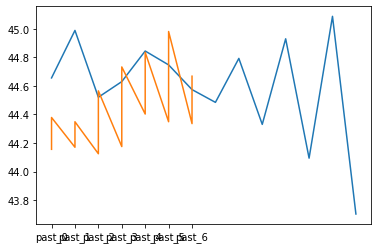

In [20]:
plt.plot(prediction, label='test')
plt.plot(Y_test.iloc[0], label='real_data')
plt.legend

In [17]:
np.array([prediction])
np.array([list(Y_test.iloc[0])])

MSE = sklearn.metrics.mean_squared_error(np.array([list(Y_test.iloc[0])]), np.array([prediction]))
print("Mean Squared Error = " + str(MSE))

MAE = sklearn.metrics.mean_absolute_error(np.array([list(Y_test.iloc[0])]), np.array([prediction]))
print("Mean Absolute Error = " + str(MAE))

Mean Squared Error = 0.3303869878571421
Mean Absolute Error = 0.5265214285714279


# MSE and MAE (errors parameters)

In [18]:
np.array([prediction])
np.array([list(Y_test.iloc[0])])

MSE = sklearn.metrics.mean_squared_error(np.array([list(Y_test.iloc[0])]), np.array([prediction]))
print("Mean Squared Error = " + str(MSE))

MAE = sklearn.metrics.mean_absolute_error(np.array([list(Y_test.iloc[0])]), np.array([prediction]))
print("Mean Absolute Error = " + str(MAE))


Mean Squared Error = 0.3303869878571421
Mean Absolute Error = 0.5265214285714279


In [19]:
diff = np.linalg.norm(Y_test - prediction)
diff

2.1506784580685205